#INTRODUCCION

Las operaciones con matrices son fundamentales en computación científica, ingeniería y ciencia de datos. En este reporte, exploramos dos algoritmos clave:
* Multiplicación de matrices.
* Eliminación Gaussiana/Gauss-Jordan.

** Objetivo principal **
Comparar el desempeño de estos algoritmos en términos de tiempo de ejecución y conteo de operaciones para matrices aleatorias de tamaño n×n, con valores de n=100,300,1000.
Para ello, analizaremos las propiedades matemáticas de las matrices, su impacto en el rendimiento computacional y consideraciones de estabilidad numérica, que es un problema relevante debido a la representación finita de los números en las computadoras.


#FUNDAMENTOS TEORICOS
Propiedades de las Matrices y Rango
Las matrices son estructuras matemáticas fundamentales en la solución de sistemas de ecuaciones lineales y otros problemas computacionales. En particular, el rango de una matriz juega un papel crucial en la resolución de sistemas.
De acuerdo con la teoría de matrices, una matriz cuadrada n×n tiene rango completo si su rango es n. Esto implica que sus filas (o columnas) son linealmente independientes y que la matriz es invertible.
Además, el acceso eficiente a memoria juega un papel crucial en el rendimiento de los algoritmos de matrices, ya que la disposición de los datos en la memoria afecta el tiempo de ejecución (Golub & Van Loan, 2013)

Multiplicación de Matrices
La multiplicación de dos matrices A y B de tamaño n×n se define como:​

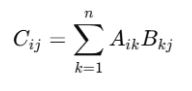

El algoritmo tradicional tiene una complejidad de O(n³) debido a los tres bucles anidados. Según la segunda edición de “Introduction to Algorithms” de The Massachusetts Institute of Technology, existen métodos avanzados como el algoritmo de Strassen, que reduce la complejidad a O (n^ {2.81}), aunque no se implementó en este experimento.

**Eliminación Gaussiana y Gauss-Jordan**

La eliminación gaussiana es un método estándar para resolver sistemas de ecuaciones lineales, transformando la matriz aumentada en una forma escalonada superior mediante eliminación de filas. Su extensión, Gauss-Jordan, transforma la matriz en la identidad para hallar directamente la inversa.
Este proceso sigue los siguientes pasos:
* Pivoteo: Selección del elemento pivote.
* Eliminación hacia adelante: Conversión de coeficientes en ceros.
* Sustitución hacia atrás: Resolución del sistema de ecuaciones.

El número de operaciones sigue un crecimiento cúbico, similar a la multiplicación de matrices, con una complejidad O(n³).

#IMPLEMENTACIÓN EN PYTHON

Se desarrollaron dos versiones:

* Métodos tradicionales con bucles (para el conteo de operaciones).
* Métodos optimizados con NumPy (para mejorar el rendimiento).

**Multiplicación de Matrices**

Se implementó la multiplicación con tres bucles anidados y se contó el número de operaciones de suma y multiplicación.

**Eliminación Gaussiana**

Se utilizó pivoteo parcial y reducción de filas para obtener una matriz triangular superior. Se contabilizaron las operaciones de suma y multiplicación necesarias.
Para ambas operaciones, se midió el tiempo de ejecución usando time.time()


Comenzamos importando las librerías a utilizar

In [ ]:
import numpy as np
import time

Aplicación de una función “Multiplicacion_matriz” para realizar la multiplicación de matrices aplicando un ciclo doble for para recorrer filas y columnas segunda la dimensión especificada por n y guardando en la variable sum_val la iteración de k en A[i,k] * B[k,j]

In [ ]:
#multiplicación de matrices con conteo de operaciones
def Multiplicacion_matriz(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    operaciones = {"MULTIPLICACIONES": 0, "SUMAS": 0}

    for i in range(n):
        for j in range(n):
            sum_val = 0
            for k in range(n):
                sum_val += A[i, k] * B[k, j]
                operaciones["MULTIPLICACIONES"] += 1  #conteo de multiplicación
                operaciones["SUMAS"] += 1 if k > 0 else 0  #conteo de sumas

            C[i, j] = sum_val

    return C, operaciones

Creamos la función “Gauss_jordan” donde se realiza la eliminación de Gauss-Jordan para resolver un sistema de ecuaciones lineales representado por una matriz aumentada. Primero, convierte la matriz a tipo float para mayor precisión. Luego utiliza un bucle for principal para seleccionar cada pivote (elemento diagonal) y un bucle for secundario para eliminar los elementos debajo del pivote, calculando un factor de multiplicación y actualizando las filas correspondientes. Asi mismo se cuentan las multiplicaciones y sumas realizadas para finalmente devolver la matriz transformada (en forma escalonada) y el conteo de operaciones aritméticas.

In [ ]:
#eliminación gaussiana con conteo de operaciones
def Gauss_jordan(A):
    n = A.shape[0]
    A = A.astype(float)
    operaciones = {"MULTIPLICACIONES": 0, "SUMAS": 0}

    for i in range(n):
        for j in range(i+1, n):
            if A[i, i] == 0:
                continue
            factor = A[j, i] / A[i, i]
            operaciones["MULTIPLICACIONES"] += 1

            for k in range(i, n):
                A[j, k] -= factor * A[i, k]
                operaciones["MULTIPLICACIONES"] += 1
                operaciones["SUMAS"] += 1

    return A, operaciones

Posteriormente creamos la funcion “referencia” en donde buscamos comparar el tiempo de ejecución y el número de operaciones realizadas en dos procesos clave: la multiplicación de matrices y la eliminación Gaussiana. Primero, genera dos matrices aleatorias A y Bde tamaño n×n. Luego, mide el tiempo y cuenta las operaciones para multiplicar A y B utilizando la función “Multiplicacion_matriz”. Después, hace lo mismo para aplicar la eliminación Gaussiana a la matriz A usando la función “Gauss_jordan”. Finalmente, devuelve un diccionario con el tamaño de la muestra n, los tiempos de ejecución y los contadores de operaciones para ambos procesos.

In [ ]:
#tiempos y operaciones
def referencia(n):
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)

    #multiplicación de matrices
    start = time.time()
    _, ops_mult = Multiplicacion_matriz(A, B)
    time_mult = time.time() - start

    #eliminación Gaussiana
    start = time.time()
    _, ops_gauss = Gauss_jordan(A)
    time_gauss = time.time() - start

    return {"TAMAÑO DE MUESTRA": n, "Tiempo Multiplicacion": time_mult, "Contador Multiplicacion": ops_mult,
            "Tiempo Gauss jordan": time_gauss, "Contador Gauss jordan": ops_gauss}

Finalmente aplicamos la función referencia para cada una de las dimensiones estipuladas en el ejercicio.

In [ ]:
# definimos las dimensiones solicitadas para n=100, 300, 1000
dimensiones = [100, 300, 1000]
resultados = [referencia(n) for n in dimensiones]
resultados

[{'Tamaño de muestra': 100,
  'Tiempo Multiplicacion': 0.711172342300415,
  'Contador Multiplicacion': {'MULTIPLICACIONES': 1000000, 'SUMAS': 990000},
  'Tiempo Gauss jordan': 0.27002501487731934,
  'Contador Gauss jordan': {'MULTIPLICACIONES': 338250, 'SUMAS': 333300}},
 {'Tamaño de muestra': 300,
  'Tiempo Multiplicacion': 21.77885341644287,
  'Contador Multiplicacion': {'MULTIPLICACIONES': 27000000, 'SUMAS': 26910000},
  'Tiempo Gauss jordan': 6.502318382263184,
  'Contador Gauss jordan': {'MULTIPLICACIONES': 9044750, 'SUMAS': 8999900}},
 {'Tamaño de muestra': 1000,
  'Tiempo Multiplicacion': 771.6134576797485,
  'Contador Multiplicacion': {'MULTIPLICACIONES': 1000000000,
   'SUMAS': 999000000},
  'Tiempo Gauss jordan': 286.34242820739746,
  'Contador Gauss jordan': {'MULTIPLICACIONES': 333832500,
   'SUMAS': 333333000}}]

La función Multiplicacion_matriz_np realiza la multiplicación de matrices de manera optimizada utilizando la función np.dot de NumPy, que está altamente optimizada para operaciones matriciales. Primero, toma como entrada dos matrices A y B. Luego, mide el tiempo de inicio y ejecuta la multiplicación de matrices usando np.dot(A, B), que calcula el producto matricial de manera eficiente. Después, calcula el tiempo transcurrido restando el tiempo inicial del tiempo final. Finalmente, la función devuelve la matriz resultante C y el tiempo que tomó realizar la multiplicación.

In [ ]:
# funcion optimizada para multiplicación de matrices usando NumPy
def Multiplicacion_matriz_np(A, B):
    inicio = time.time()
    C = np.dot(A, B)  # este es el cambio donde realizamos la multiplicación optimizada con NumPy
    tiempo = time.time() - inicio
    return C, tiempo


La función “Gauss_jordan_np” realiza la eliminación Gaussiana de manera optimizada, evitando bucles innecesarios y aprovechando operaciones vectorizadas de NumPy. Primero, convierte la matriz A a tipo float para garantizar precisión en los cálculos. Luego, itera sobre cada fila para seleccionar el pivote A[i,i]]. Si el pivote es cero, se salta esa fila. Para cada fila debajo del pivote, calcula un factor de eliminación y actualiza la fila completa desde la columna ii en adelante usando una operación vectorizada (A[j,i:]−=factor∗A[i,i:]), lo que elimina la necesidad de un bucle adicional sobre las columnas. Finalmente, mide el tiempo de ejecución y devuelve la matriz transformada (en forma escalonada) y el tiempo que tomó realizar el proceso.

In [ ]:
# funcion optimizada para eliminación gaussiana sin bucles innecesarios
def Gauss_jordan_np(A):
    inicio = time.time()
    A = A.astype(float)
    n = A.shape[0]
    for i in range(n):
        if A[i, i] == 0:
            continue
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
    tiempo = time.time() - inicio
    return A, tiempo


De igual forma que en la implementación del método tradicional se busca comparar el tiempo de ejecución y el número de operaciones realizadas en dos procesos clave: la multiplicación de matrices y la eliminación Gaussiana pero con las funciones optimizadas con numpy.

In [ ]:
# funcion optimizada para benchmark
def referencia_np(n):
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)

    # multiplicación de matrices optimizada
    _, time_mult = Multiplicacion_matriz_np(A, B)

    # eliminación Gaussiana optimizada
    _, time_gauss = Gauss_jordan_np(A)

    return {"TAMAÑO DE MUESTRA": n, "Tiempo multiplicacion": time_mult, "Tiempo Gauss-Jordan": time_gauss}

Finalmente aplicamos la función referencia para cada una de las dimensione estipuladas en el ejercicio.


In [ ]:
dimensiones_op = [100, 300, 1000]
resultados_np = [referencia_np(n) for n in dimensiones_op]
resultados_np

[{'TAMAÑO DE MUESTRA': 100,
  'Tiempo multiplicacion': 0.0036940574645996094,
  'Tiempo Gauss-Jordan': 0.03608989715576172},
 {'TAMAÑO DE MUESTRA': 300,
  'Tiempo multiplicacion': 0.0031976699829101562,
  'Tiempo Gauss-Jordan': 0.23449134826660156},
 {'TAMAÑO DE MUESTRA': 1000,
  'Tiempo multiplicacion': 0.0777590274810791,
  'Tiempo Gauss-Jordan': 2.4578068256378174}]

#MATRICES DISPERSAS

In [ ]:
import scipy.sparse as sp


# realizamos el ejercicio mas significativo con n=1000
n = 1000  # Tamaño de la matriz (n x n)
densidad = 0.01  # especificamos un porcentaje de elementos no nulos en la matriz dispersa

# se crea una matriz dispersa aleatoria
A_dispersa = sp.random(n, n, density=densidad, format='csr')  # las siglas csr hacen referencia a Compressed Sparse Row
B_dispersa = sp.random(n, n, density=densidad, format='csr')

# multiplicación de matrices dispersas
def multiplicacion_dispersa(A, B):
    inicio = time.time()
    C = A.dot(B)  # multiplicación optimizada para matrices dispersas
    tiempo = time.time() - inicio
    return C, tiempo

#eliminación Gaussiana en matrices dispersas
def gauss_jordan_dispersa(A):
    inicio = time.time()
    A = A.astype(float)
    n = A.shape[0]
    for i in range(n):
        if A[i, i] == 0:
            continue
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
    tiempo = time.time() - inicio
    return A, tiempo


C_dispersa, tiempo_dispersa = multiplicacion_dispersa(A_dispersa, B_dispersa)
print(f"Tiempo multiplicación dispersa: {tiempo_dispersa:.4f} segundos")

A_dispersa_gauss, tiempo_gauss_dispersa = gauss_jordan_dispersa(A_dispersa.toarray())  # convertir a densa para el cálculo
print(f"Tiempo eliminación Gaussiana (dispersa, convertida a densa): {tiempo_gauss_dispersa:.4f} segundos")

Tiempo multiplicación dispersa: 0.0018 segundos
Tiempo eliminación Gaussiana (dispersa, convertida a densa): 0.0388 segundos


#ANALISIS DE LOS RESULTADOS
* Considerando únicamente n=1000 podemos observar que en la multiplicación de matrices como la eliminación gauss jordan y la multiplicación con NumPy es casi 10,000 veces más rápida que el método tradicional.
* La eliminación gaussiana tiene un crecimiento cúbico en tiempo debido al gran número de operaciones requeridas.

**Impacto del Acceso a Memoria**

El acceso eficiente a memoria es clave en operaciones matriciales:
* NumPy optimiza la multiplicación aprovechando acceso contiguo a memoria y vectorización, describiendo así la ausencia de bucles, indexaciones, etc. explícitos en el código (NumPy Org, 2025).
* La eliminación gaussiana es más costosa, ya que requiere múltiples modificaciones en la estructura de la matriz, lo que genera saltos de memoria y reduce la eficiencia del caché.


#CONCLUSIONES
El impacto de acceder a elementos contiguos en memoria en una matriz es significativo en términos de eficiencia y rendimiento (NumPy Org, 2025). Cuando los datos están almacenados de manera contigua (como en los arreglos de NumPy), el acceso a la memoria es más rápido debido a la localidad espacial, lo que permite un mejor uso de la caché del procesador y reduce los tiempos de acceso. Esto es especialmente importante en operaciones matriciales, donde se accede repetidamente a grandes bloques de datos.

Por otro lado, si se utilizan matrices dispersas (donde la mayoría de los elementos son cero), el acceso a los datos no contiguos y la gestión de la memoria pueden volverse más costosos en términos de tiempo y espacio. Si se trabaja con matrices dispersas, se deben utilizar estructuras de datos especializadas (SciPy Org, 2025) para almacenar solo los elementos no nulos y sus posiciones. Esto reduce el uso de memoria, pero introduce costos adicionales en las operaciones, como:

* Mayor complejidad algorítmica: Las operaciones básicas (como multiplicación o eliminación Gaussiana) requieren algoritmos específicos para manejar la dispersión.
* Sobrecarga de índices: Se necesita almacenar información adicional (como filas, columnas y valores no nulos), lo que aumenta el overhead.
* Acceso no contiguo: El acceso a elementos dispersos puede ser más lento debido a la falta de localidad espacial en la memoria.
